In [11]:
%matplotlib inline

import os
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing, datasets
from sklearn.neighbors import KNeighborsClassifier

plt.style.use("ggplot")

# Load and parse Iris data set from URL

In [12]:
iris = os.path.join("https://archive.ics.uci.edu", "ml", "machine-learning-databases", "iris", "iris.data")
data = pd.read_csv(iris, header=None, encoding="utf-8")

# Process and clean the data

In [13]:
proc = preprocessing.LabelEncoder()
sepal_length = proc.fit_transform(list(data[0]))
sepal_width = proc.fit_transform(list(data[1]))
petal_length = proc.fit_transform(list(data[2]))
petal_width = proc.fit_transform(list(data[3]))
species = proc.fit_transform(list(data[4]))

predict = 4 # Species 

x = list(zip(sepal_length, sepal_width, petal_length, petal_width))
y = list(species)

# Train and predict species

In [14]:
variations = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
best = 0
worst = 100
results = []

for i in range(105):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.7)

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    
    accuracy = model.score(x_test, y_test)
    if accuracy > best:
        best = accuracy
    elif accuracy < worst:
        worst = accuracy
    
    prediction = model.predict(x_test)
    results.append(f"Prediction:\t{variations[prediction[i]].ljust(10)}\t\tActual: {variations[y_test[i]].ljust(10)}\t\tAccuracy: {str(round(accuracy * 100, 2)).ljust(5)}%\tData: {x_test[i]}")

In [15]:
for result in results:
    print(result)
    
print(f"\nHighest Accuracy: {round((best * 100), 2)}%")
print(f"Worst Accuracy: {round((worst * 100), 2)}%")

Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 97.14%	Data: (26, 11, 33, 19)
Prediction:	Iris-versicolor		Actual: Iris-virginica		Accuracy: 90.48%	Data: (19, 7, 24, 14)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 97.14%	Data: (5, 9, 4, 0)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 95.24%	Data: (17, 9, 24, 14)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 96.19%	Data: (3, 15, 0, 1)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 96.19%	Data: (7, 13, 6, 3)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 96.19%	Data: (7, 12, 4, 1)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 94.29%	Data: (24, 12, 33, 21)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 90.48%	Data: (21, 8, 19, 9)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 96.19%	Data: (33, 7, 41, 16)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 95.24%	Data: (15, 6, 27, 15)
Prediction:	Iris-versicolor	

# Graphical illustration

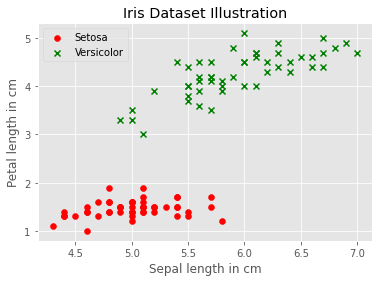

In [16]:
y = data.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

X = data.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="green", marker="x", label="Versicolor")

plt.title("Iris Dataset Illustration")
plt.xlabel("Sepal length in cm")
plt.ylabel("Petal length in cm")
plt.grid(True)
plt.legend()


# 3D Modeling (Not Iris related yet)

In [17]:
# import random
# from mpl_toolkits import mplot3d


# x = [random.randrange(0, 9) for _ in range(100)]
# y = [random.randrange(0, 9) for _ in range(100)]
# z = [random.randrange(0, 9) for _ in range(100)]

# fig = plt.figure()
# ax = plt.axes(projection="3d")
# ax.scatter3D(x, y, z)



# Perceptron method
1. The perceptron learning rule was first developed by Frank Rosenblatt in 1957, based on the MCP neuron model.
2. With this perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that would then be multiplied with the input features in order to make the decision of wether the neuron should fire or not.
3. In the context of supervised learning and classifications, such an algorithm could not be used to predict whether a new data point belongs to one class or another.
4. We can put the idea behind artificial neurons into the context of a binary classification task where we refer to our two classes as 1 (positive class) and -1 (negative class) for simplicity.
5. We can then define a decision function $ø(z)$ that takes a linear combination of certain input values, $x$, and a corresponding weight wector $w$, where $z$ is called the net-input:
* $\mathbf{z} = w_{1},x_{1} + w_{2},x_{2} + w_{3},x_{3} + ... + w_{m} + x_{m} $
6. If the net input of the particular example $x^{(i)}$, is greater than a defined threshold, ${\theta}$, we predict class 1, and class -1 otherwise.
7. In the perceptron algorithm, the decision function, $ø(^.)$, is a variant of a unit step function:
* $ø(z) = 1 $ if $ z \ge 0, $ else $ -1$
8. For simplicity, we can bring the threshold, ${\theta}$, to the left side of the equation and define a weight-zero as $w_0 = -{\theta}$ and $x_0 = 1$ so we write $z$ in a more compact form:
* $z = w_0,x_0 + w_1,x_1 + ... + w_m,x_m = w^t x$
9. The negative threshold , or weight $w_0 = -{\theta}$ is usually called the bias unit.

In [18]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.w_ = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Conversion example; When a neural network reaches the peak of preciseness.

Text(0, 0.5, 'Amount of updates')

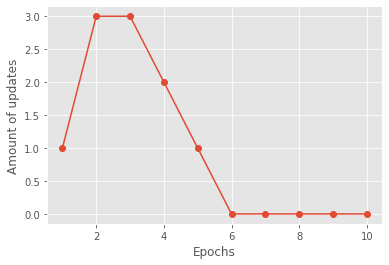

In [19]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Amount of updates")

# Convenience function to vizualize decision boundries for 2-dimensional datasets

<ipython-input-20-c5da0ced147b>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


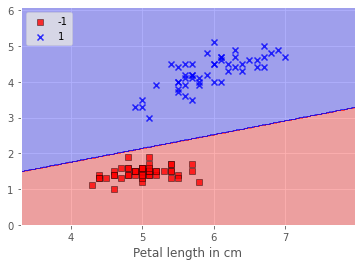

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class example
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors="black")

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal length in cm")
plt.xlabel("Petal length in cm")
plt.legend(loc="upper left")
    